<font size="4"><b>Baixar pandas e openpyxl</b></font>

pip install pandas

pip install openpyxl

In [1]:
import pandas as pd

<font size="5"><b>Consolidando as Bases de Vendas</b></font>

In [2]:
#aqui você insere a pasta em que você coloca suas tabelas bases
base_path = "C:\\Users\\lucas\\OneDrive\\Área de Trabalho\\tecnica_maximatech\\"

anos = ['2016', '2017', '2018']
#levando em consideração que você salvou os arquivos excel de Base Vendas em uma pasta chamada "base_vendas"
base_vendas_consolidado = pd.concat(
    [pd.read_excel(f"{base_path}base_vendas\\Base Vendas - {ano}.xlsx") for ano in anos]
)

<font size="3">Puxarei as bases de cadastros e farei um merge (equivalente a um left join no SQL) para puxar todas informações dos cadastros e adicionar nas colunas em uma Base de Vendas Consolidada com todos anos</font>

In [3]:
cadastro_localidades = pd.read_excel(f"{base_path}cadastros\\Cadastro Localidades.xlsx")[['Cidade', 'Estado']]
cadastro_lojas = pd.read_excel(f"{base_path}cadastros\\Cadastro Lojas.xlsx")[['Loja', 'Gerente']]
cadastro_clientes = pd.read_excel(f"{base_path}cadastros\\Cadastro Clientes.xlsx")
cadastro_produtos = pd.read_excel(f"{base_path}cadastros\\Cadastro Produtos.xlsx")

In [4]:
vendas_merge = pd.merge(base_vendas_consolidado, cadastro_localidades, left_on='Loja', right_on='Cidade', how='left')
vendas_merge = pd.merge(vendas_merge, cadastro_clientes, on='Código Cliente', how='left')
vendas_merge = pd.merge(vendas_merge, cadastro_lojas, on='Loja', how='left')
vendas_final = pd.merge(vendas_merge, cadastro_produtos, on='SKU', how='left')

In [5]:
vendas_final

,SKU,Tamanho Pedido,Loja,Data da Venda,Código Cliente,Cidade,Estado,Primeiro Nome,Sobrenome,Sexo,Data de Nascimento,E-mail,Gerente,Produto,Marca,Categoria,Preço Unitário,Custo Unitário
0,HL1021,5,Salvador,2016-01-01,97,Salvador,BA,GUSTAVO,JUNIOR,M,11/4/1956,gustavo17@gmail.com,Diego Amorim,Galaxy S8,Samsung,Celular,3000,1400
1,HL1021,2,Niterói,2016-01-01,546,Niterói,RJ,MICHELLE,MIURA,F,11/14/1966,michelle54@gmail.com.br,Matheus Leal,Galaxy S8,Samsung,Celular,3000,1400
2,HL1019,1,Guarulhos,2016-01-01,496,Guarulhos,SP,JOÃO,BACH,M,4/4/1981,joão29@live.com.br,Natália Candiotto,iPhone XS,Apple,Celular,6500,2800
3,HL1023,1,Campinas,2016-01-01,663,Campinas,SP,VANESSA,BACH,F,8/5/1975,vanessa41@gmail.com,Eduardo Julianelli,Samsung Dual Core,Samsung,Notebook,1500,550
4,HL1016,5,Fortaleza,2016-01-01,288,Fortaleza,CE,IZABEL,LOPES,F,10/7/1998,izabel62@yahoo.com,Carolina Cotta,Smart Watch Galaxy,Samsung,Smart Watch,1450,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23792,HL1019,2,São Paulo,2018-12-31,55,São Paulo,SP,CAIO,FERREIRA,M,12/30/1984,caio55@icloud.com,Marcus Cavalcanti,iPhone XS,Apple,Celular,6500,2800
23793,HL1003,1,Guarulhos,2018-12-31,152,Guarulhos,SP,KIM,FERREIRA,F,7/15/1952,kim50@icloud.com.br,Natália Candiotto,Galaxy S10,Samsung,Celular,4500,2800
23794,HL1019,3,São Paulo,2018-12-31,79,São Paulo,SP,CAIO,MORAES,M,12/16/1956,caio63@msn.com,Marcus Cavalcanti,iPhone XS,Apple,Celular,6500,2800
23795,HL1022,1,Niterói,2018-12-31,809,Niterói,RJ,NORMAN,JIMBO,M,8/27/1959,norman54@outlook.com,Matheus Leal,iPad 32GB Wifi,Apple,Tablet,750,350


<font size="4">Agora que temos um dataframe final de vendas podemos transforma-lo em um arquivo excel e passar para o Power BI fazendo alguns paineis com nossas KPIs desejadas</font>

In [6]:
vendas_final.to_excel(f"{base_path}relatorios_excel\\Vendas com Cadastros.xlsx", index=False)

<font size="4">Agora iremos arrumar a base de devoluções com os cadastros</font>

In [7]:
base_devolucoes = pd.read_excel(f"{base_path}base_vendas\\Base Devoluções.xlsx")

In [8]:
base_devolucoes_merge = pd.merge(base_devolucoes,cadastro_produtos, on='SKU',how='left')
base_devolucoes_merge = pd.merge(base_devolucoes_merge,cadastro_lojas, on='Loja',how='left')

In [9]:
base_devolucoes_merge.to_excel(f"{base_path}relatorios_excel\\Devoluções com Cadastro.xlsx", index=False)

É importante ver se existem dados com erros ou sem valor,farei uma detecção para entender se devemos ou não corrigir alguma coluna

In [10]:
null_check = vendas_final.isnull().any()
print(null_check)

SKU                   False
Tamanho Pedido        False
Loja                  False
Data da Venda         False
Código Cliente        False
Cidade                 True
Estado                 True
Primeiro Nome         False
Sobrenome             False
Sexo                  False
Data de Nascimento    False
E-mail                False
Gerente               False
Produto               False
Marca                 False
Categoria             False
Preço Unitário        False
Custo Unitário        False
dtype: bool


Como podemos ver existem valores null nas colunas Cidade e Estado,para isso irei printar as linhas quando essas colunas não tem valor

In [11]:
linhas_com_null = vendas_final[vendas_final['Cidade'].isnull() | vendas_final['Estado'].isnull()]

print(linhas_com_null)

          SKU  Tamanho Pedido         Loja Data da Venda  Código Cliente  \
21     HL1008               2  Nova Iguaço    2016-01-01             324   
31     HL1018               3  Nova Iguaço    2016-01-01             460   
69     HL1008               4  Nova Iguaço    2016-01-03             690   
110    HL1022               3  Nova Iguaço    2016-01-04              25   
131    HL1021               5  Nova Iguaço    2016-01-06             455   
...       ...             ...          ...           ...             ...   
23733  HL1014               1  Nova Iguaço    2018-12-29             717   
23741  HL1021               1  Nova Iguaço    2018-12-30             308   
23758  HL1001               5  Nova Iguaço    2018-12-30               9   
23774  HL1002               2  Nova Iguaço    2018-12-31             543   
23785  HL1005               1  Nova Iguaço    2018-12-31              25   

      Cidade Estado Primeiro Nome Sobrenome Sexo Data de Nascimento  \
21       NaN    

<font size="3">Como podemos ver o dataset passado tem colunas com o valor "Nova Iguaço" referente a coluna Loja sendo que o certo é "Nova Iguaçu",também posso fazer essa mudança usando o Power BI através da função de substituição de valores.
Já que esses nulls só acontecem quando o valor é Nova Iguaço podemos substituir todos eles sem medo de adicionarmos um dado errado</font>

In [12]:
vendas_final['Cidade'] = vendas_final['Cidade'].fillna('Nova Iguaçu')

vendas_final['Estado'] = vendas_final['Estado'].fillna('RJ')

In [13]:
#agora podemos checar se todos valores nulls foram substituidos
null_check = vendas_final.isnull().any()
print(null_check)

SKU                   False
Tamanho Pedido        False
Loja                  False
Data da Venda         False
Código Cliente        False
Cidade                False
Estado                False
Primeiro Nome         False
Sobrenome             False
Sexo                  False
Data de Nascimento    False
E-mail                False
Gerente               False
Produto               False
Marca                 False
Categoria             False
Preço Unitário        False
Custo Unitário        False
dtype: bool


<font size="5"><b>Power BI</b></font>


<font size="4">Importei a Vendas com Cadastros,Devoluções com Cadastro,Calendário e todas planilhas de cadastro anteriores para dentro do Power BI, e iniciei a criação de relatórios.

Primeiro iniciei com os paineis de Produtos: Vendas por Categoria de Produto e Taxa de Devolução por Produto,para isso criei as seguintes fórmulas no DAX: <br><b>Vendas por Categoria de Produto = SUMX(FILTER('Base de Vendas', 'Base de Vendas'[Categoria] <> BLANK()), 'Base de Vendas'[Tamanho Pedido] * 'Base de Vendas'[Preço Unitário])<b>

<b>Taxa de Devolução por Produto =<br> 
DIVIDE(<br>
    [Total Devolvido por Produto],<br>
    [Total Vendido por Produto],<br>
    0<br>
)</b>

Sendo:<br> <b>Total Devolvido por Produto = SUM('Base de Devoluções'[Quantidade Devolvida])</b><br><b>Total Vendido por Produto = SUM('Base de Vendas'[Tamanho Pedido])</b></font>

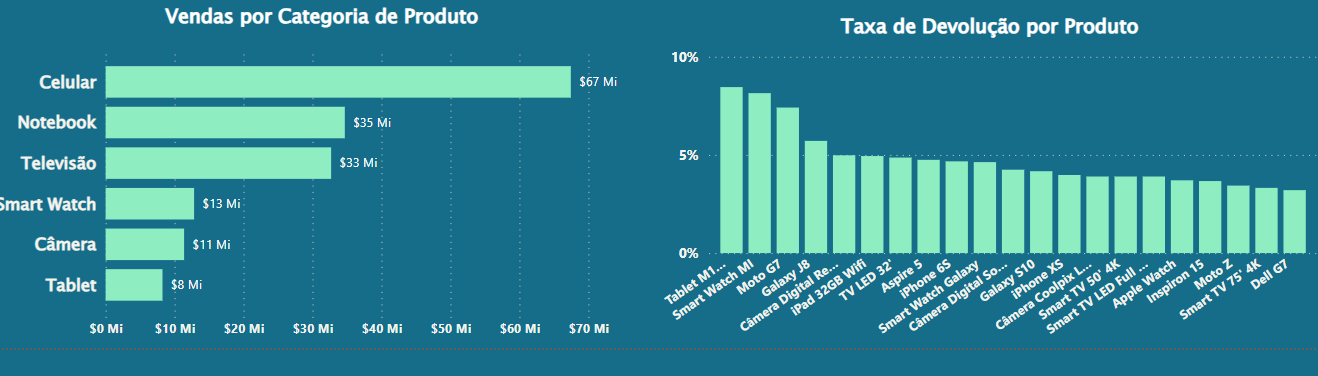

<font size="4">Após isso iniciei os relatórios de Vendas por Mês e Ano e Vendas por Loja,para isso precisei fazer a conexão do Calendário e da Base de Vendas no modelo.<br><font>
<br>
<font size="4">Para isso criei outras fórmulas no DAX: Total Vendas,Vendas por Loja e Localidade<br><br>
<b>Total Vendas = SUMX('Base de Vendas', 'Base de Vendas'[Tamanho Pedido] * 'Base de Vendas'[Preço Unitário])</b><br><br>
<b>Vendas por Loja e Localidade = SUMX(<br>
    'Base de Vendas',<br>
    'Base de Vendas'[Tamanho Pedido] * 'Base de Vendas'[Preço Unitário]<br>
)
</b></font><br>
<font size="3">Com isso eu já conseguia,através do calendário com as novas colunas de dia,mês e ano adicionadas,fazer uma análise em relação as vendas por mês e ano da empresa,conseguindo assim ter uma consciência do crescimento da mesma<font><br>
<font size="3">Nesse momento é importante dizer que tive uma dúvida entre usar Mês e Ano ou Trimestre,mas como o espaço amostral de 3 anos é muito pequeno acabei por tomar a decisão de usar meses e anos para termos uma métrica mais real</font>

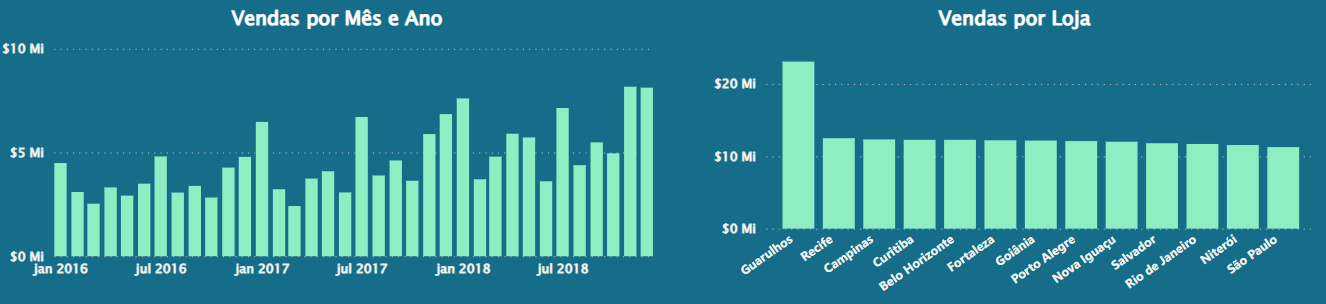

<font size="4"> Para a conclusão do projeto só precisava arrumar certos filtros e adicionar um cartão de faturamento da empresa para termos acesso tanto as vendas por mês e ano quanto ao faturamento cumulativo no card<font>
<br><br>
<font size="3">Dessa maneira prossegui na criação de 5 slicers para criar um filtro de usuário nos dados de: <b>Região, Loja, Categoria, Produto e Data</b><br><br></font>

<font size="3">Por fim só criei um card de faturamento para ter acesso as vendas acumuladas em um determinado espaço de tempo</font>

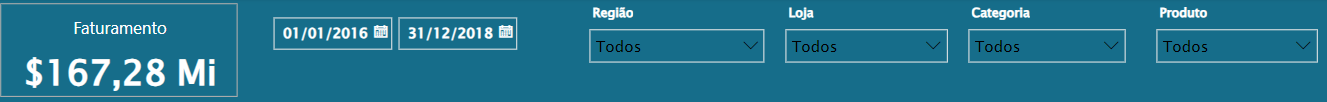

<font size="5">Com isso temos o Dashboard final</font><br><br>
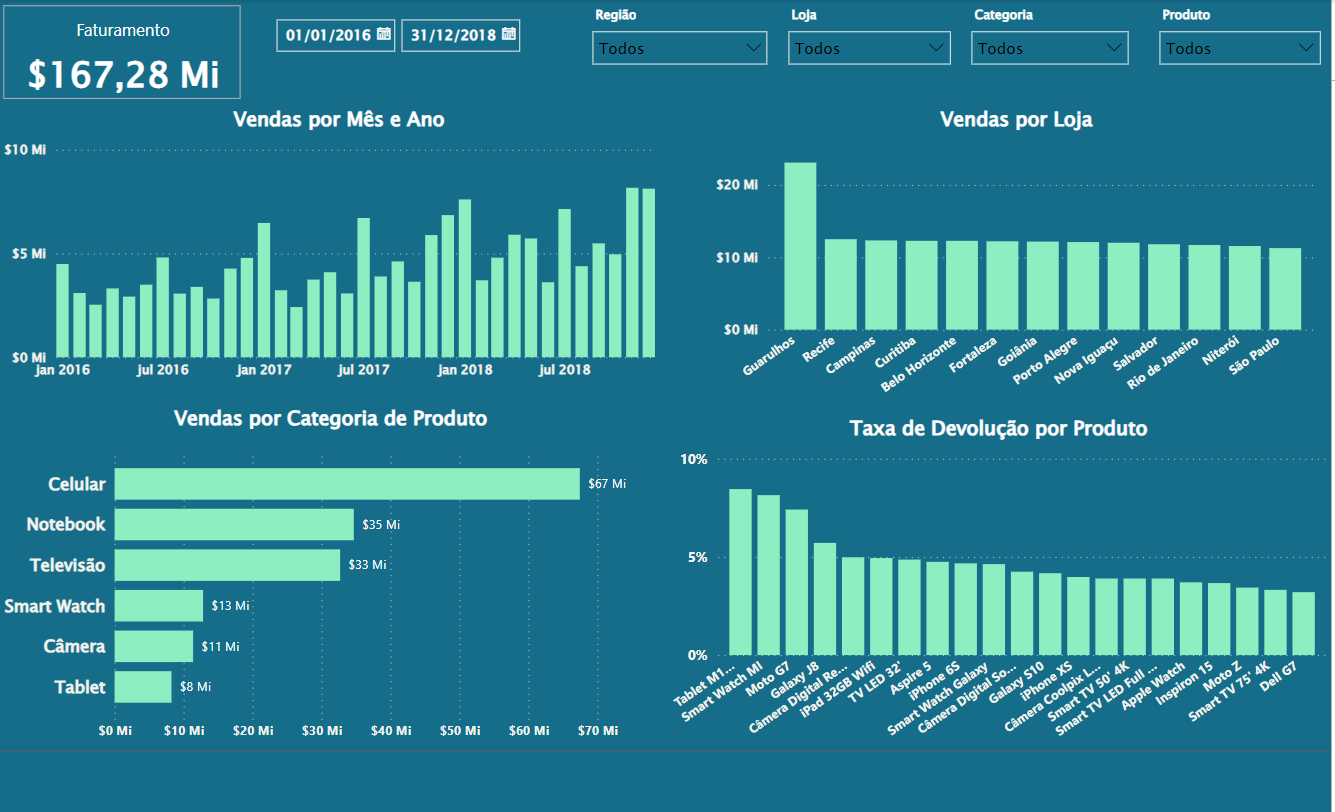

<font size="4">Acredito que é um bom treino para o estudo da Dataviz e ETL e completamente realista com a vaga,decidi fazer uma parte no Python pois um dos requisitos era o conhecimento dessa linguagem</font><br><br>
<font size="4">Como esse dataframe é pequeno e extremamente sólido (sem muitos erros e dados faltantes) não foi necessário nenhuma ideia mais complexa para chegar no resultado esperado</font>
<br><br>
<font size="4">Por fim posso afirmar que caso o dataset fosse maior poderia ter dado uma maior ênfase na estatística e em algoritmos de IA,por exemplo se tivessem mais dados de Base de Vendas seria possível fazer uma regressão linear para uma expectativa de faturamento dos próximos meses ou anos</font>
<font size="4"><br><br><b>Desde já agradeço pela oportunidade na vaga,até a próxima etapa!</b>